In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import figure
import matplotlib.dates as mdates
import json
import seaborn as sns

# **1. Loading Data**



Here are the paths to the data we use.

In [ ]:
PATH_ROOT = '/content/drive/MyDrive/ADA'
PATH_PARQUET = PATH_ROOT + '/Project datasets'
PATH_QUOTEBANK = PATH_ROOT + '/Quotebank'
PATH_TO_CLEAN = PATH_ROOT + '/Cleaned_data'
PATH_TO_QUOTES = PATH_TO_CLEAN + '/quote_topics_cleaned.parquet'
PATH_TO_TOPICS = PATH_ROOT + '/topics_info.json'

##1.1 Loading quote topics

In [ ]:
df = pd.read_parquet(PATH_TO_QUOTES)
df.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,topic
4,2020-01-23-024008,"He got on top of me, and he raped me.",Annabella Sciorra,Q231395,2020-01-23 00:00:00,75,733
5,2020-01-31-027972,How many players in the N.B.A. have a huge rol...,Brian Baldinger,Q4963033,2020-01-31 10:00:17,4,266
11,2020-02-21-029926,If we choose a candidate who appeals to a smal...,Michael R. Bloomberg,Q607,2020-02-21 01:07:54,4,10
12,2020-01-27-036296,"If your last name was not Biden, do you think ...",Joe Biden,Q6279,2020-01-27 14:33:49,14,85
13,2020-01-31-052530,"It was not manslaughter, it wasn't a crime,",Walter Van Steenbrugge,Q2104597,2020-01-31 17:57:18,2,214


In [ ]:
df.info

<bound method DataFrame.info of                   quoteID  ... topic
4       2020-01-23-024008  ...   733
5       2020-01-31-027972  ...   266
11      2020-02-21-029926  ...    10
12      2020-01-27-036296  ...    85
13      2020-01-31-052530  ...   214
...                   ...  ...   ...
858354  2018-09-04-104135  ...  2027
858358  2018-06-11-107317  ...   754
858361  2018-06-14-137014  ...   578
858362  2018-08-29-137323  ...    48
858366  2018-09-29-072126  ...   616

[222649 rows x 7 columns]>

In [ ]:
df.describe()

,numOccurrences,topic
count,222649.000000,222649.000000
mean,18.594245,1067.277585
std,109.800916,1412.439232
min,1.000000,0.000000
25%,1.000000,106.000000
50%,3.000000,474.000000
75%,7.000000,1441.000000
max,16362.000000,7071.000000


## 1.2. Loading of topics dataset

In [ ]:
df_topics = pd.read_json(PATH_TO_TOPICS, orient='index')
df_topics.head(22)

,Topic,Count,Name
0,-1,420063,-1_defendants_defendant_prosecution_dressed
1,0,4380,0_russias_putins_vladimir_moscow
2,1,3926,1_beijing_chinas_chinaus_beijings
3,2,2647,2_justices_judges_judicial_judiciary
4,3,2290,3_negro_africanamericans_blacks_africanamerican
5,4,2205,4_singing_sing_sang_songwriting
6,5,1980,5_yorkers_yorker_brooklyn_yorks
7,6,1942,6_solutions_fixing_fixes_repair
8,7,1904,7_cristiano_ronaldo_mourinho_zlatan
9,8,1791,8_deduction_taxation_deductions_taxed


## 1.3 Loading wikidata labels



Wiki quotations map the ID to their label. In that way, we know what the QID's mean.

In [ ]:
wiki_quotation = pd.read_csv(PATH_PARQUET + '/wikidata_labels_descriptions_quotebank.csv.bz2', compression='bz2', index_col='QID')

We have a look at what it looks like:



In [ ]:
wiki_quotation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36969 entries, Q31 to Q106376887
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Label        32951 non-null  object
 1   Description  24542 non-null  object
dtypes: object(2)
memory usage: 866.5+ KB


In [ ]:
wiki_quotation.head()

,Label,Description
QID,,
Q31,Belgium,country in western Europe
Q45,Portugal,country in southwestern Europe
Q75,Internet,global system of connected computer networks
Q148,People's Republic of China,sovereign state in East Asia
Q155,Brazil,country in South America


## 1.4 Loading speakers dataset

We load the dataframe containing the list of the speakers.

In [ ]:
df_speakers = pd.read_parquet(PATH_TO_CLEAN + '/speakers_cleaned.parquet')

We have a look at what it looks like:

In [ ]:
df_speakers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9055981 entries, 0 to 9055980
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   aliases             object 
 1   date_of_birth       float64
 2   nationality         object 
 3   gender              object 
 4   lastrevid           int64  
 5   ethnic_group        object 
 6   US_congress_bio_ID  object 
 7   occupation          object 
 8   party               object 
 9   academic_degree     object 
 10  id                  object 
 11  label               object 
 12  candidacy           object 
 13  type                object 
 14  religion            object 
 15  nb_aliases          int64  
dtypes: float64(1), int64(2), object(13)
memory usage: 1.1+ GB


In [ ]:
df_speakers.head()

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion,nb_aliases
0,"[Washington, President Washington, G. Washingt...",1732.0,"[Q161885, Q30]",[Q6581097],1395141751,None,W000178,"[Q82955, Q189290, Q131512, Q1734662, Q294126, ...",[Q327591],None,Q23,George Washington,"[Q698073, Q697949]",item,[Q682443],5
1,"[Douglas Noel Adams, Douglas Noël Adams, Dougl...",1952.0,[Q145],[Q6581097],1395737157,[Q7994501],None,"[Q214917, Q28389, Q6625963, Q4853732, Q1884422...",None,None,Q42,Douglas Adams,None,item,None,3
2,"[Paul Marie Ghislain Otlet, Paul Marie Otlet]",1868.0,[Q31],[Q6581097],1380367296,None,None,"[Q36180, Q40348, Q182436, Q1265807, Q205375, Q...",None,None,Q1868,Paul Otlet,None,item,None,2
3,"[George Walker Bush, Bush Jr., Dubya, GWB, Bus...",1946.0,[Q30],[Q6581097],1395142029,None,None,"[Q82955, Q15982858, Q18814623, Q1028181, Q1408...",[Q29468],None,Q207,George W. Bush,"[Q327959, Q464075, Q3586276, Q4450587]",item,"[Q329646, Q682443, Q33203]",10
4,"[Velázquez, Diego Rodríguez de Silva y Velázqu...",1599.0,[Q29],[Q6581097],1391704596,None,None,[Q1028181],None,None,Q297,Diego Velázquez,None,item,None,120


In [ ]:
df['speaker'].value_counts()

President Donald Trump    5137
President Trump           3622
Bill de Blasio             894
Hillary Clinton            788
Bernie Sanders             764
                          ... 
Michaela Angela Davis        1
Flavio Di Muro               1
Guan Youfei                  1
Ginger Baker                 1
Shang Chunsong               1
Name: speaker, Length: 46751, dtype: int64

#**2. Preprocessing**

#1. Creation of clean dataset: merge of quotebank with speakers

We create a dataframe that is relevant to our study: quotes with their number of occurrences, merged to the speakers dataframe (so that we have the infos on the speakers).

In [ ]:
df_clean = pd.DataFrame()

df_clean = df[['quoteID','qids', 'date', 'numOccurrences', 'topic']].merge(df_speakers[['id', 'nationality', 'date_of_birth', 'gender', 'ethnic_group', 'occupation', 'party', 'religion']], how='left', left_on = 'qids', right_on='id')
df_clean.drop(['id'], axis=1, inplace =True)

df_clean.head()

,quoteID,qids,date,numOccurrences,topic,nationality,date_of_birth,gender,ethnic_group,occupation,party,religion
0,2020-01-23-024008,Q231395,2020-01-23 00:00:00,75,733,[Q30],NaN,[Q6581072],None,"[Q3282637, Q10800557, Q10798782, Q2259451]",None,None
1,2020-01-31-027972,Q4963033,2020-01-31 10:00:17,4,266,[Q30],1959.0,[Q6581097],None,[Q19204627],None,None
2,2020-02-21-029926,Q607,2020-02-21 01:07:54,4,10,[Q30],1942.0,[Q6581097],[Q7325],"[Q43845, Q82955, Q2095549, Q36180, Q1424605, Q...","[Q29552, Q29468, Q29552]","[Q9268, Q1133485]"
3,2020-01-27-036296,Q6279,2020-01-27 14:33:49,14,85,[Q30],1942.0,[Q6581097],None,"[Q82955, Q40348, Q1622272]",[Q29552],[Q1841]
4,2020-01-31-052530,Q2104597,2020-01-31 17:57:18,2,214,[Q31],1964.0,[Q6581097],None,[Q40348],None,None


#2. Create clean dataset with topic

In [ ]:
eco_words = "economic|economy|economist|trade|finance|financial|banking|market|commerce|invest|money|fund|business|product|cash|taxation"
eco_topics = df_topics[df_topics['Name'].str.contains(eco_words)]
eco_topics = eco_topics[eco_topics['Count']>50]

# **3. A quick data analysis**

##0. Quick tools

In [ ]:
def analysis (df_clean, feature, max_feature, eco):

  #To get the different features, we decided to create a new dataframe and split the rows with several features into different columns. Furthermore, we drop all the quotes where the speaker has not mentioned his·her feature concerned.
  df = df_clean.dropna(subset=[feature]).copy()
  df = df.reset_index(drop=True)
  max_size = df[feature].apply(lambda f : len(f) if f is not None and isinstance(f, float) == False else 0).max()
  feat_list = []
  for i in range(max_size):
    feat_list.append(feature + '_' + str(i))
  df = pd.concat([df, pd.DataFrame(df[feature].to_list(), columns =feat_list)], axis=1)
  df = df.reset_index(drop=True)
  #The number of quotes for which we know the nationality of their speaker is the following:
  nb_speakers_with_feat = df[feature].notna().sum()
  nb_speakers = df_clean['quoteID'].count()
  proportion = nb_speakers_with_feat / nb_speakers
  print("There are", nb_speakers_with_feat, "quotes for which we know the", feature, "of their speaker which means {:.2f}% of all the quotes in out datasst.\n".format(proportion*100))

  #We create a new dataset that melts of the features in one column
  df_melt = df.melt(id_vars = ['quoteID', 'numOccurrences'], value_vars=feat_list, var_name='columns', value_name='index')
  df_melt = df_melt.dropna(subset=['index'])
  df_melt = df_melt.reset_index(drop=True)
  df_melt.drop(['columns'], axis=1, inplace=True)
  df_melt = df_melt.reset_index(drop=True)
  
  list_f_occ = df_melt.drop(['quoteID'], axis=1).groupby('index')['numOccurrences'].sum().sort_values(ascending=False)
  list_f = df_melt.drop(['quoteID'], axis=1).copy()
  list_f['numOccurrences'] = list_f['numOccurrences'].apply(lambda row: 1)
  list_f = list_f.groupby('index')['numOccurrences'].sum().sort_values(ascending=False)
  
  #We plot the distribution of the feature
  calculate_prop(list_f_occ, eco, max_feature, "Distribution of the speakers' {} counting the number of occurrences of {} quotations.\n".format(feature, eco))
  calculate_prop(list_f, eco, max_feature, "Distribution of the speakers' {} regardless the number of occurrences of {} quotations.\n".format(feature, eco))

In [ ]:
def calculate_prop(list_n, eco, max_size, title) :
  # This function creates the different plots
  name = []
  prop = []
  tot = list_n.sum()
  print("In terms of {} quotation".format(eco))
  for i in range(max_size):
    x=wiki_quotation.filter(regex='{}$'.format(list_n.index.tolist()[i]), axis = 0)['Label'][0]
    nb_i = list_n[i]
    prop_i = nb_i/tot
    name.append(x)
    prop.append(prop_i)
    print("The proportion of speakers {} overall is {:.3f}% with {} persons.".format(x, prop_i*100, nb_i))

  prop.append(1-sum(prop))
  name.append('Other')
  colors=['c', 'g', 'r', 'b', 'm', 'y', 'w', 'purple', '#ee966b', '#4a274f', 'y']
  fig1, ax1 = plt.subplots(figsize=(20,10))
  ax1.pie(prop, labels=name, autopct='%1.1f%%',
          shadow=True, startangle=90, colors=colors[0:max_size+1])
  ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.title(title)

  plt.show()

##1. Dates of birth of the speakers of the quotes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


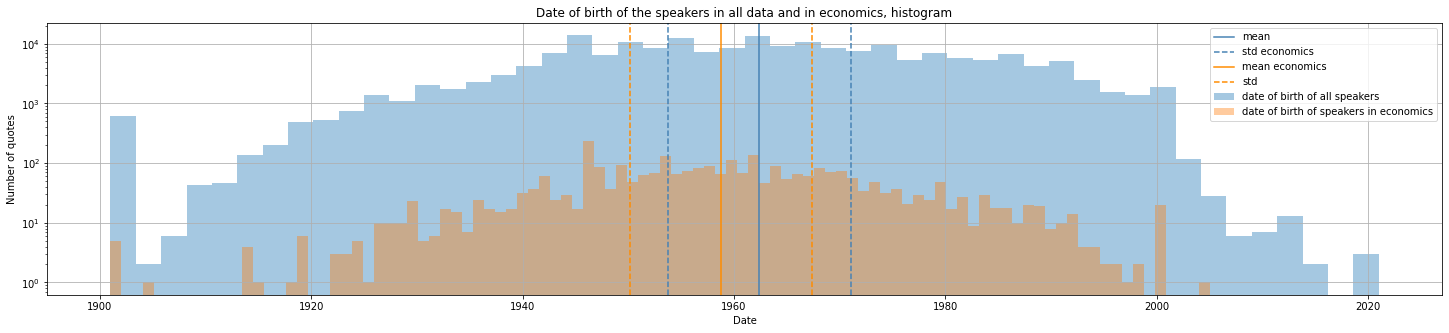

In [ ]:
dob = df_clean.dropna(subset=['date_of_birth'])[df_clean.date_of_birth > 1900]
dob = dob.rename(columns={"date_of_birth": "date of birth of all speakers"})
dob.loc[:, 'date of birth of all speakers'].hist(bins = 50, figsize = (15,5), alpha=0.4, legend=True)

plt.axvline(dob.loc[:, 'date of birth of all speakers'].mean(), color='steelblue', label='mean')
plt.axvline(dob.loc[:, 'date of birth of all speakers'].mean() - dob.loc[:, 'date of birth of all speakers'].std()/2, ls='--', color='steelblue', label='std economics')
plt.axvline(dob.loc[:, 'date of birth of all speakers'].mean() + dob.loc[:, 'date of birth of all speakers'].std()/2, ls='--', color='steelblue')

dob_eco = df_clean[df_clean['topic'].isin(eco_topics['Topic'])].dropna(subset=['date_of_birth'])[df_clean.date_of_birth > 1899]
dob_eco = dob_eco.rename(columns={"date_of_birth": "date of birth of speakers in economics"})
dob_eco.loc[:, 'date of birth of speakers in economics'].hist(bins=100, figsize = (25, 5), alpha=0.4, legend=True)

plt.axvline(dob_eco.loc[:, 'date of birth of speakers in economics'].mean(), color='darkorange', label='mean economics')
plt.axvline(dob_eco.loc[:, 'date of birth of speakers in economics'].mean() - dob.loc[:, 'date of birth of all speakers'].std()/2, ls='--', color='darkorange', label='std')
plt.axvline(dob_eco.loc[:, 'date of birth of speakers in economics'].mean() + dob.loc[:, 'date of birth of all speakers'].std()/2, ls='--', color='darkorange')

plt.yscale('log')
plt.xlabel('Date')
plt.ylabel('Number of quotes')
plt.legend()
plt.title('Date of birth of the speakers in all data and in economics, histogram')

As it seems weird that some speakers are born after 2017, we arbitrarily decided to drop those quotes. For example: the quote with the speaker that has a date of birth of 2021 is Charles Bombardier: it is a mistake.

In [ ]:
df_clean = df_clean[df_clean['date_of_birth']< 2017]

##2. Dates of quotations

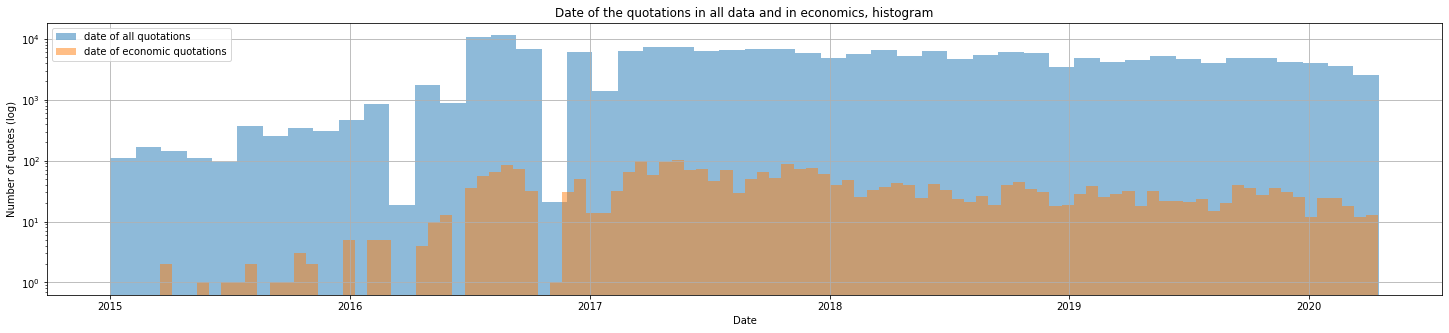

In [ ]:
doq = df_clean.rename(columns={"date": "date of all quotations"}).loc[:, 'date of all quotations']
doq.hist(bins = 50, figsize = (15,5), alpha=0.5, legend=True)

doq_eco = df_clean[df_clean['topic'].isin(eco_topics['Topic'])].rename(columns={"date": "date of economic quotations"})
doq_eco.loc[:, 'date of economic quotations'].hist(bins=100, figsize = (25, 5), alpha=0.5, legend=True)
plt.yscale('log')
plt.xlabel('Date')
plt.ylabel('Number of quotes (log)')
plt.title('Date of the quotations in all data and in economics, histogram')
plt.show()

##3. Distribution of the number of occurrences

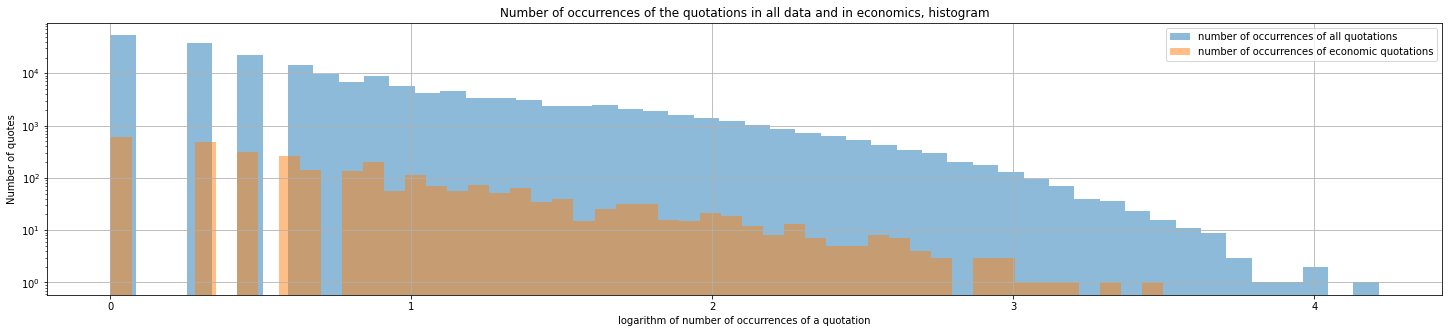

In [ ]:
occ = df_clean.rename(columns={"numOccurrences": "number of occurrences of all quotations"})
occ = occ.loc[:, 'number of occurrences of all quotations']
np.log10(occ).hist(bins = 50, figsize = (25,5), alpha=0.5, legend=True)

occ_eco = df_clean[df_clean['topic'].isin(eco_topics['Topic'])].rename(columns={"numOccurrences": "number of occurrences of economic quotations"})
occ_eco = occ_eco.loc[:, 'number of occurrences of economic quotations']
np.log10(occ_eco).hist(bins=50, figsize = (25, 5), alpha=0.5, legend=True)

plt.yscale('log')
plt.xlabel('logarithm of number of occurrences of a quotation')
plt.ylabel('Number of quotes')
plt.title('Number of occurrences of the quotations in all data and in economics, histogram');

The above plot shows that the number of quotes as a function of the number of occurences approximately follows a power law. Note that the x axis gives the log base 10 of the number of occurences. This is similar to a log-log plot and both histograms can be fitted by a straight line.

##4. Number of speakers in our dataset

We first start by getting the overall number of speakers that are here in our database.

In [ ]:
nb_speakers = df.groupby('qids')['qids'].nunique().sum()
print("There are", nb_speakers, "different speakers among all the quotations.")

There are 45752 different speakers among all the quotations.


In [ ]:
nb_speakers = df_clean[df_clean['topic'].isin(eco_topics['Topic'])].groupby('qids')['qids'].nunique().sum()
print("There are", nb_speakers, "different speakers among the economic quotations.")

There are 1633 different speakers among the economic quotations.


## 5. Nationality analysis

There are 187437 quotes for which we know the nationality of their speaker which means 93.75% of all the quotes in out datasst.

In terms of all quotation
The proportion of speakers United States of America overall is 72.617% with 2992790 persons.
The proportion of speakers United Kingdom overall is 3.932% with 162048 persons.
The proportion of speakers France overall is 1.758% with 72472 persons.
The proportion of speakers Canada overall is 1.551% with 63919 persons.
The proportion of speakers Germany overall is 1.537% with 63332 persons.
The proportion of speakers Russia overall is 1.112% with 45842 persons.
The proportion of speakers Australia overall is 1.026% with 42292 persons.
The proportion of speakers Soviet Union overall is 0.973% with 40100 persons.
The proportion of speakers Italy overall is 0.767% with 31607 persons.
The proportion of speakers South Africa overall is 0.665% with 27390 persons.


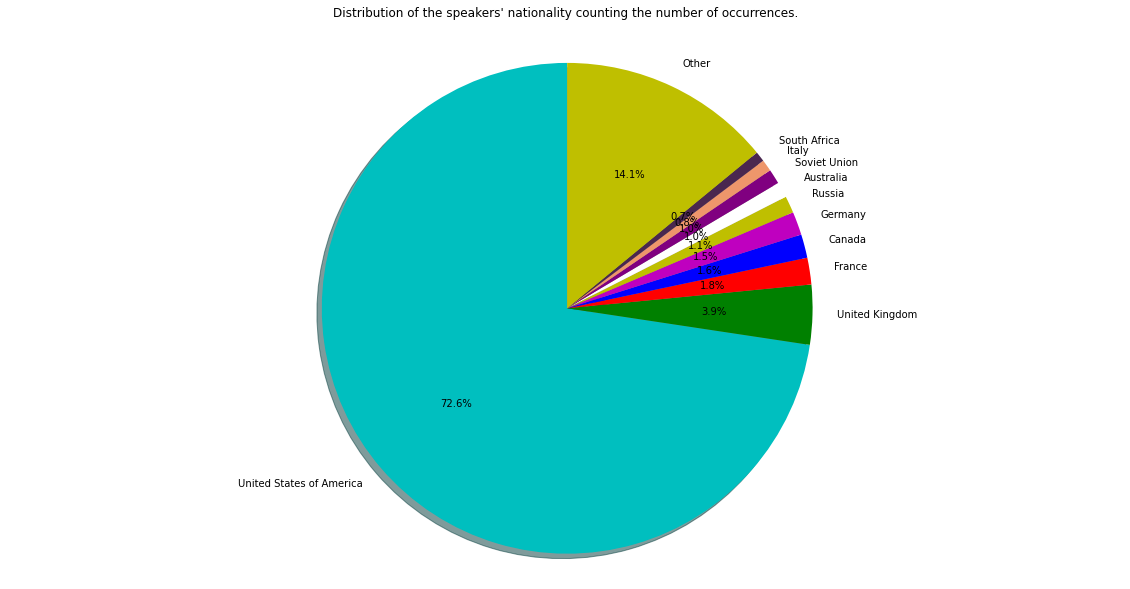

In terms of all quotation
The proportion of speakers United States of America overall is 62.108% with 125357 persons.
The proportion of speakers United Kingdom overall is 5.887% with 11882 persons.
The proportion of speakers France overall is 3.040% with 6136 persons.
The proportion of speakers Canada overall is 2.330% with 4703 persons.
The proportion of speakers Germany overall is 2.290% with 4622 persons.
The proportion of speakers Italy overall is 1.478% with 2984 persons.
The proportion of speakers Australia overall is 1.456% with 2938 persons.
The proportion of speakers Israel overall is 0.919% with 1854 persons.
The proportion of speakers Russia overall is 0.895% with 1807 persons.
The proportion of speakers South Africa overall is 0.850% with 1716 persons.


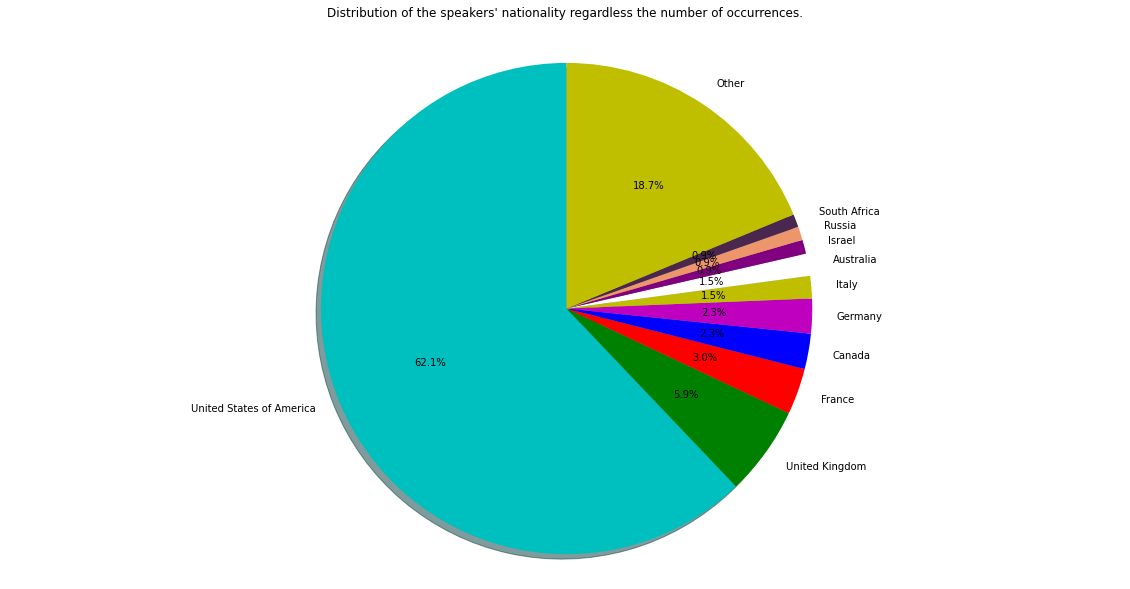

In [ ]:
analysis(df_clean, 'nationality', 10, 'all')

There are 2757 quotes for which we know the nationality of their speaker which means 92.95% of all the quotes in out datasst.

In terms of economic quotation
The proportion of speakers United States of America overall is 76.794% with 47611 persons.
The proportion of speakers United Kingdom overall is 6.707% with 4158 persons.
The proportion of speakers Denmark overall is 1.673% with 1037 persons.
The proportion of speakers Germany overall is 1.211% with 751 persons.
The proportion of speakers France overall is 1.110% with 688 persons.
The proportion of speakers Russia overall is 0.923% with 572 persons.
The proportion of speakers Australia overall is 0.903% with 560 persons.
The proportion of speakers Brazil overall is 0.818% with 507 persons.
The proportion of speakers Soviet Union overall is 0.747% with 463 persons.
The proportion of speakers Italy overall is 0.686% with 425 persons.


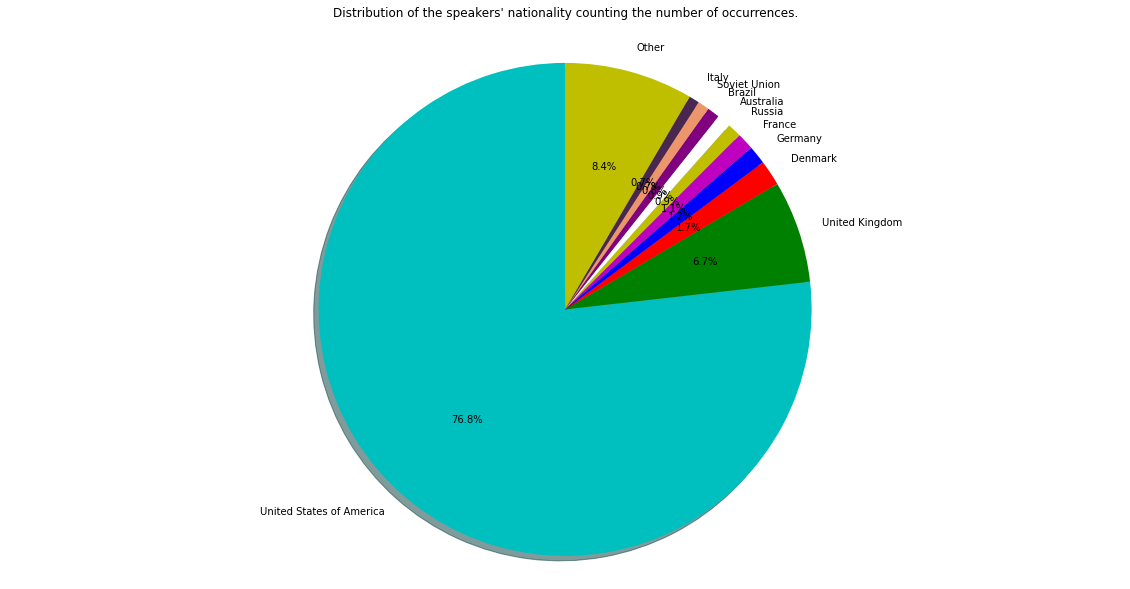

In terms of economic quotation
The proportion of speakers United States of America overall is 68.403% with 1983 persons.
The proportion of speakers United Kingdom overall is 5.795% with 168 persons.
The proportion of speakers France overall is 3.656% with 106 persons.
The proportion of speakers Germany overall is 2.656% with 77 persons.
The proportion of speakers Italy overall is 1.759% with 51 persons.
The proportion of speakers Canada overall is 1.483% with 43 persons.
The proportion of speakers Australia overall is 1.035% with 30 persons.
The proportion of speakers Denmark overall is 0.793% with 23 persons.
The proportion of speakers South Africa overall is 0.793% with 23 persons.
The proportion of speakers Russia overall is 0.690% with 20 persons.


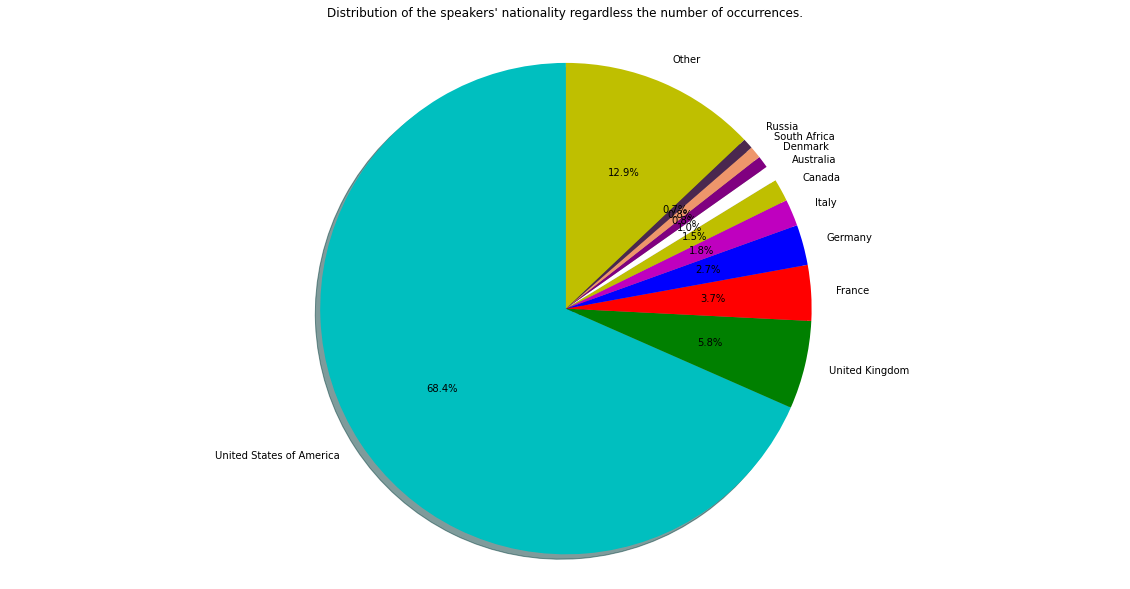

In [ ]:
analysis(df_clean[df_clean['topic'].isin(eco_topics['Topic'])], 'nationality', 10, 'economic')

##6. Gender analysis

There are 199849 quotes for which we know the gender of their speaker which means 99.95% of all the quotes in out datasst.

In terms of all quotation
The proportion of speakers male overall is 81.399% with 3204822 persons.
The proportion of speakers female overall is 18.371% with 723282 persons.


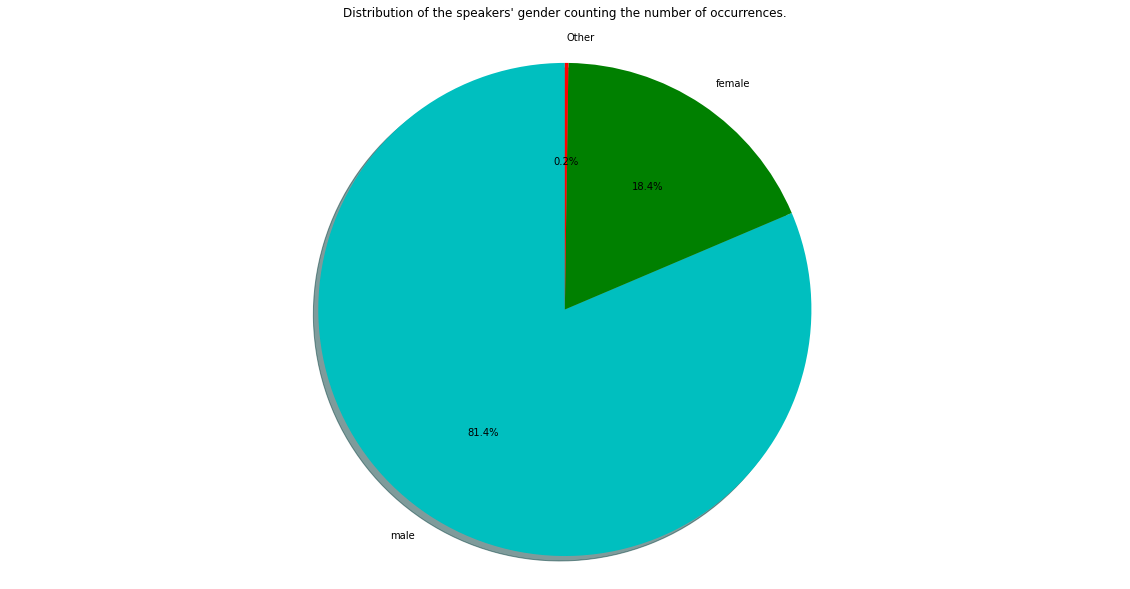

In terms of all quotation
The proportion of speakers male overall is 75.923% with 151795 persons.
The proportion of speakers female overall is 23.704% with 47392 persons.


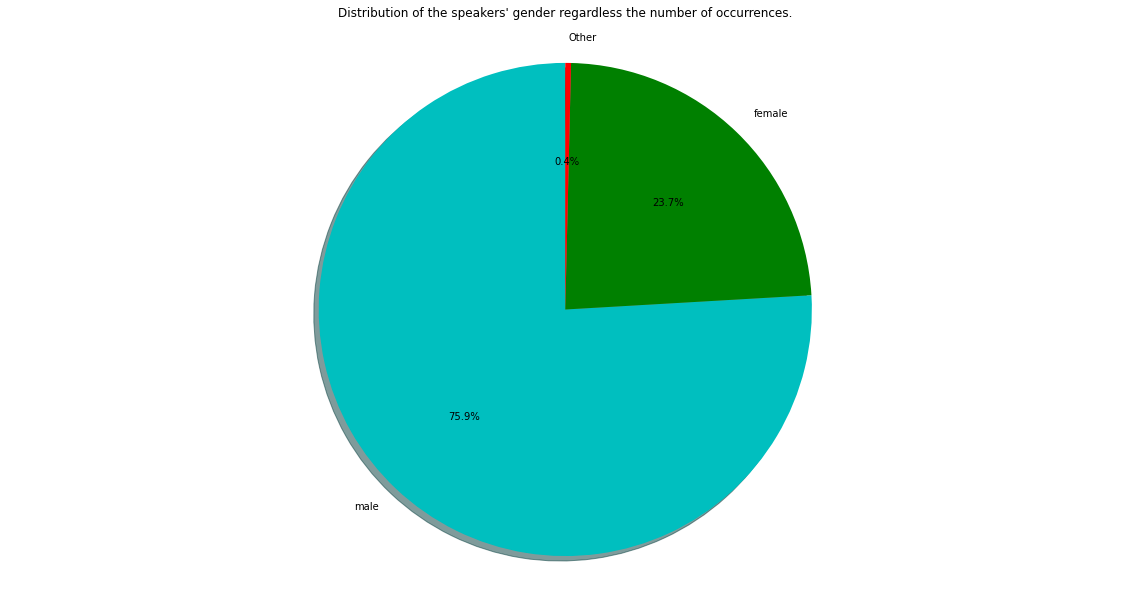

In [ ]:
analysis(df_clean, 'gender', 2, 'all')

There are 2966 quotes for which we know the gender of their speaker which means 100.00% of all the quotes in out datasst.

In terms of economic quotation
The proportion of speakers male overall is 79.689% with 48914 persons.
The proportion of speakers female overall is 20.301% with 12461 persons.


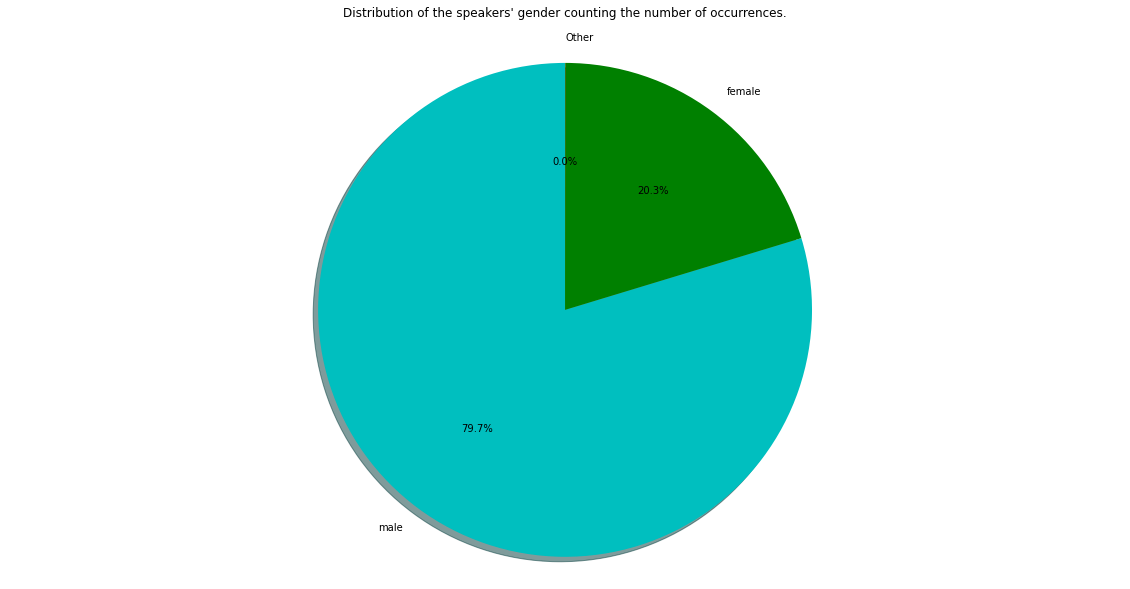

In terms of economic quotation
The proportion of speakers male overall is 82.299% with 2441 persons.
The proportion of speakers female overall is 17.599% with 522 persons.


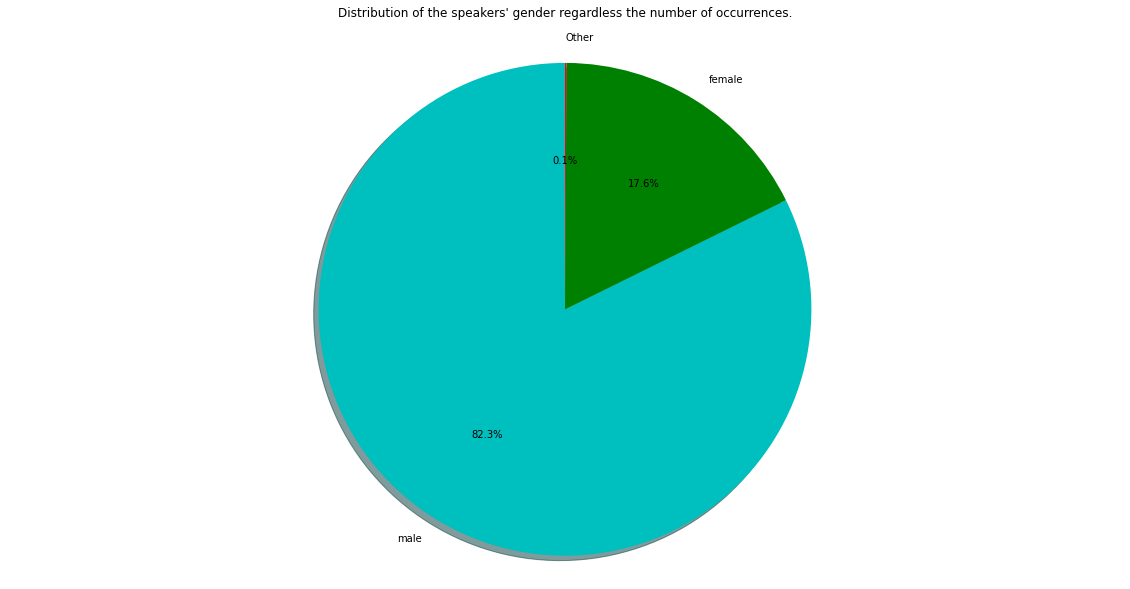

In [ ]:
analysis(df_clean[df_clean['topic'].isin(eco_topics['Topic'])], 'gender', 2, 'economic')

##7. Occupation analysis

There are 196775 quotes for which we know the occupation of their speaker which means 98.42% of all the quotes in out datasst.

In terms of all quotation
The proportion of speakers politician overall is 8.770% with 2391240 persons.
The proportion of speakers writer overall is 5.072% with 1382976 persons.
The proportion of speakers businessperson overall is 4.537% with 1237015 persons.
The proportion of speakers actor overall is 4.351% with 1186239 persons.
The proportion of speakers entrepreneur overall is 4.065% with 1108206 persons.
The proportion of speakers film producer overall is 3.993% with 1088601 persons.
The proportion of speakers television presenter overall is 3.909% with 1065679 persons.
The proportion of speakers television producer overall is 3.846% with 1048542 persons.
The proportion of speakers chief executive officer overall is 3.619% with 986814 persons.
The proportion of speakers non-fiction writer overall is 3.616% with 985819 persons.


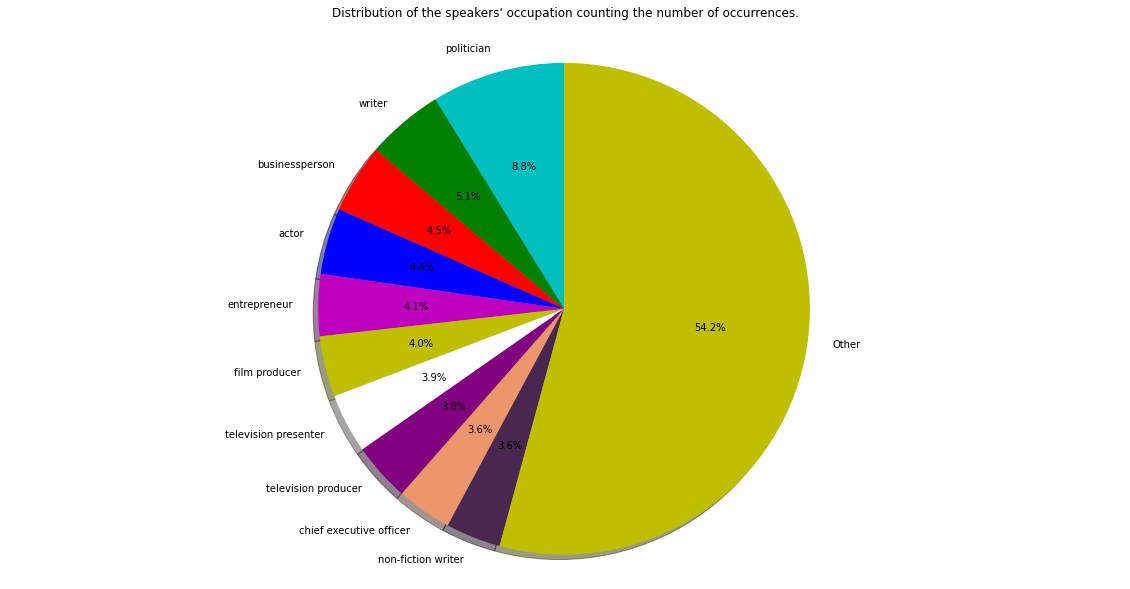

In terms of all quotation
The proportion of speakers politician overall is 9.395% with 64960 persons.
The proportion of speakers writer overall is 4.966% with 34341 persons.
The proportion of speakers lawyer overall is 3.875% with 26794 persons.
The proportion of speakers actor overall is 3.653% with 25260 persons.
The proportion of speakers businessperson overall is 3.081% with 21303 persons.
The proportion of speakers journalist overall is 2.644% with 18283 persons.
The proportion of speakers film producer overall is 2.470% with 17082 persons.
The proportion of speakers television producer overall is 2.369% with 16380 persons.
The proportion of speakers entrepreneur overall is 2.233% with 15437 persons.
The proportion of speakers television presenter overall is 2.104% with 14545 persons.


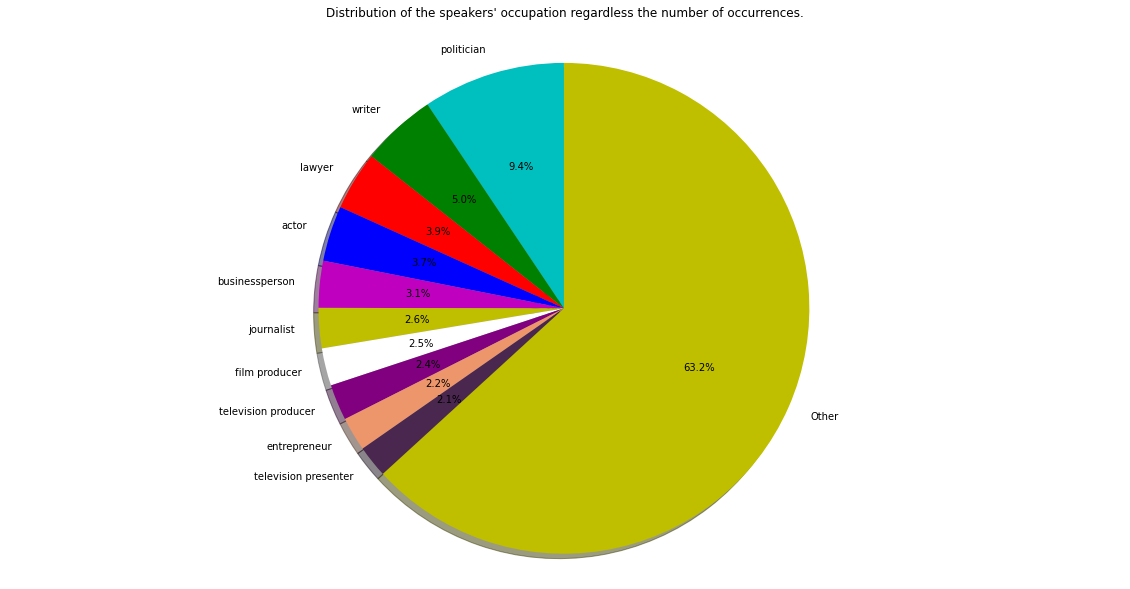

In [ ]:
analysis(df_clean, 'occupation', 10, 'all')

There are 2909 quotes for which we know the occupation of their speaker which means 98.08% of all the quotes in out datasst.

In terms of economic quotation
The proportion of speakers politician overall is 11.307% with 44271 persons.
The proportion of speakers writer overall is 4.887% with 19135 persons.
The proportion of speakers businessperson overall is 4.742% with 18569 persons.
The proportion of speakers entrepreneur overall is 4.275% with 16740 persons.
The proportion of speakers lawyer overall is 4.229% with 16559 persons.
The proportion of speakers actor overall is 4.065% with 15916 persons.
The proportion of speakers real estate developer overall is 4.057% with 15885 persons.
The proportion of speakers film producer overall is 4.053% with 15870 persons.
The proportion of speakers chief executive officer overall is 3.953% with 15479 persons.
The proportion of speakers television presenter overall is 3.893% with 15243 persons.


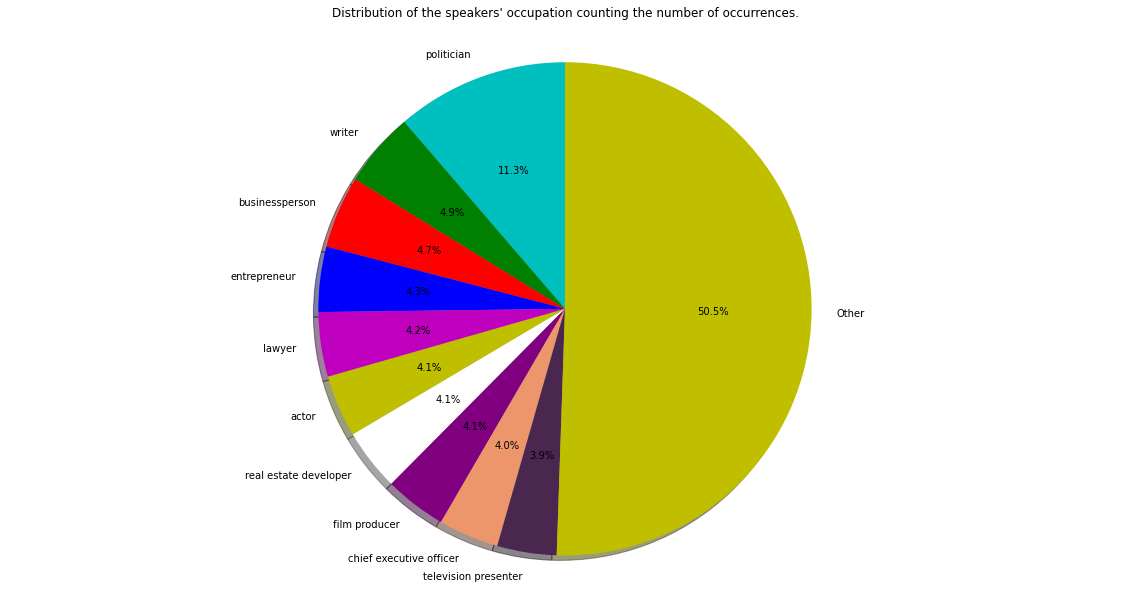

In terms of economic quotation
The proportion of speakers politician overall is 12.973% with 1375 persons.
The proportion of speakers lawyer overall is 5.133% with 544 persons.
The proportion of speakers writer overall is 4.727% with 501 persons.
The proportion of speakers businessperson overall is 4.500% with 477 persons.
The proportion of speakers economist overall is 3.821% with 405 persons.
The proportion of speakers entrepreneur overall is 3.349% with 355 persons.
The proportion of speakers actor overall is 3.066% with 325 persons.
The proportion of speakers film producer overall is 2.783% with 295 persons.
The proportion of speakers chief executive officer overall is 2.670% with 283 persons.
The proportion of speakers television producer overall is 2.500% with 265 persons.


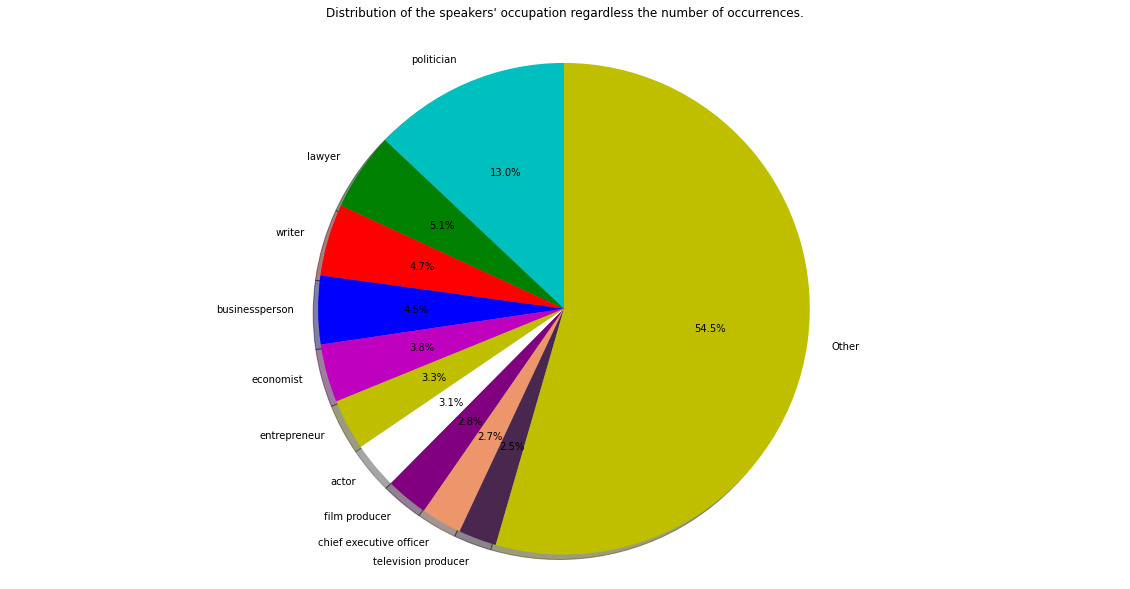

In [ ]:
analysis(df_clean[df_clean['topic'].isin(eco_topics['Topic'])], 'occupation', 10, 'economic')

##8. Topic analysis

In [ ]:
topics = pd.read_json(PATH_TO_TOPICS, orient='index')

In [ ]:
topics.head()

,Topic,Count,Name
0,-1,420063,-1_defendants_defendant_prosecution_dressed
1,0,4380,0_russias_putins_vladimir_moscow
2,1,3926,1_beijing_chinas_chinaus_beijings
3,2,2647,2_justices_judges_judicial_judiciary
4,3,2290,3_negro_africanamericans_blacks_africanamerican


We remove the topic -1 corresponding to the outliers.

In [ ]:
topics = topics.drop(0)

In [ ]:
topics = topics.drop(labels='Topic', axis=1)

In [ ]:
topics = topics.rename(columns={'Name':'Topic'})
topics.head()

,Count,Topic
1,4380,0_russias_putins_vladimir_moscow
2,3926,1_beijing_chinas_chinaus_beijings
3,2647,2_justices_judges_judicial_judiciary
4,2290,3_negro_africanamericans_blacks_africanamerican
5,2205,4_singing_sing_sang_songwriting


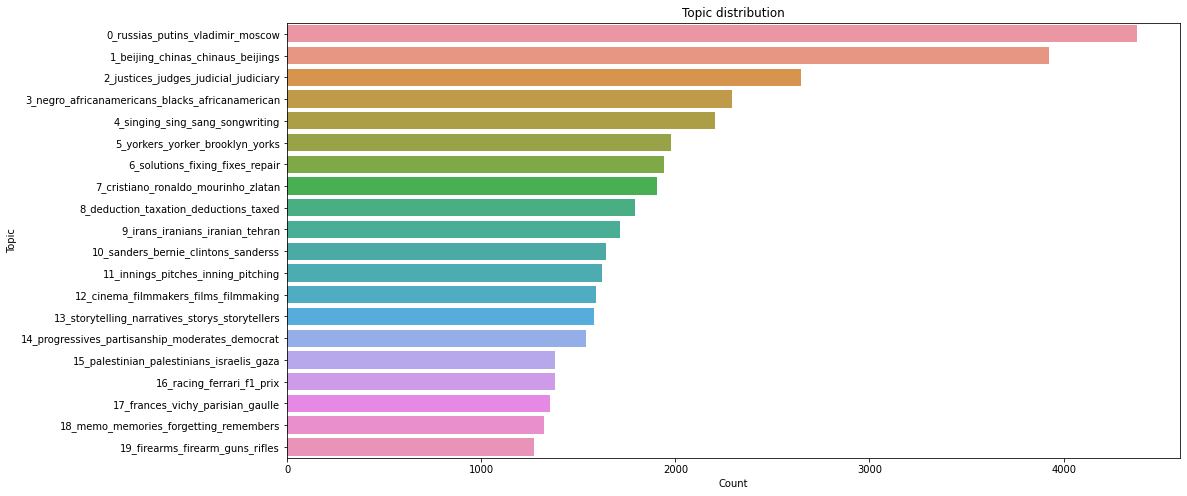

In [ ]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(x="Count", y="Topic", data=topics.iloc[:20,:])
plt.title('Topic distribution')
plt.show()

In [ ]:
# Create plot for data story

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

trace1 = go.Bar(x=topics.iloc[:20,:]["Count"], y=topics.iloc[:20,:]["Topic"], orientation='h', marker=dict(color=topics.iloc[:20,:].index, colorscale=px.colors.sequential.Plotly3))
fig = go.Figure(trace1)

#fig = make_subplots(specs=[[{"secondary_y": True}]])


fig.update_layout(title_text="Topic Distribution",
                  title_font_size=20, height=600)
fig.update_yaxes(type='category')
fig.show()
fig.write_html(PATH_ROOT+"/html_fig/topic_distribution.html")

In [ ]:
topics.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            6778, 6777, 6776, 6775, 6774, 6773, 6772, 6771, 6770, 7072],
           dtype='int64', length=7072)